In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df = pd.read_csv('Zomato data .csv') 

In [19]:
df.head() 

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [20]:
df.tail()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [22]:
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)')  # Extract numeric part
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')  # Convert to float


In [23]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
df.shape


(148, 7)

In [26]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [27]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

Type of Resturent


Text(0.5, 0, 'Type of Resturent')

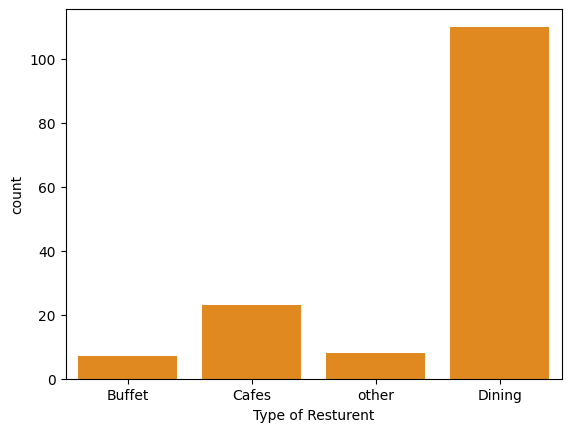

In [28]:
ax = sns.countplot( x = 'listed_in(type)' , data = df, color='darkorange' )   
plt.xlabel('Type of Resturent') 

Text(0, 0.5, 'Votes')

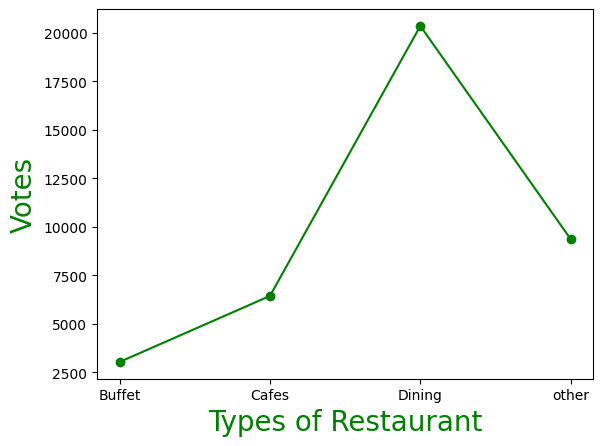

In [15]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result.index, result['votes'], color='green', marker='o')
plt.xlabel("Types of Restaurant", color="green", fontsize=20) 
plt.ylabel("Votes", color="green", fontsize=20) 

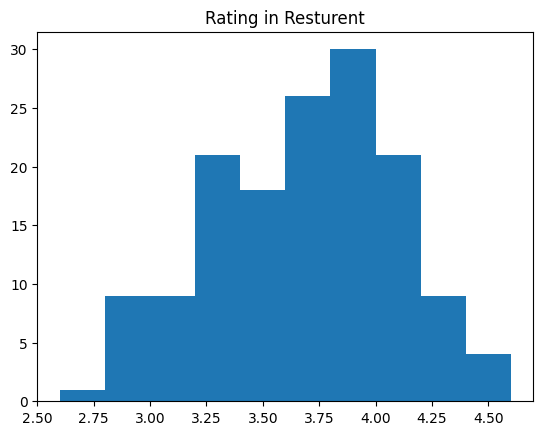

In [31]:
plt.hist(df['rate'] , bins = 10)
plt.title("Rating in Resturent")
plt.show() 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

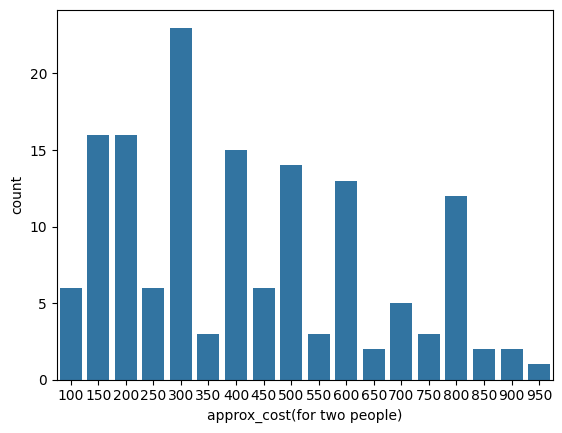

In [35]:
couple_data = df['approx_cost(for two people)'] 
sns.countplot(x = couple_data)  

<Axes: xlabel='online_order', ylabel='rate'>

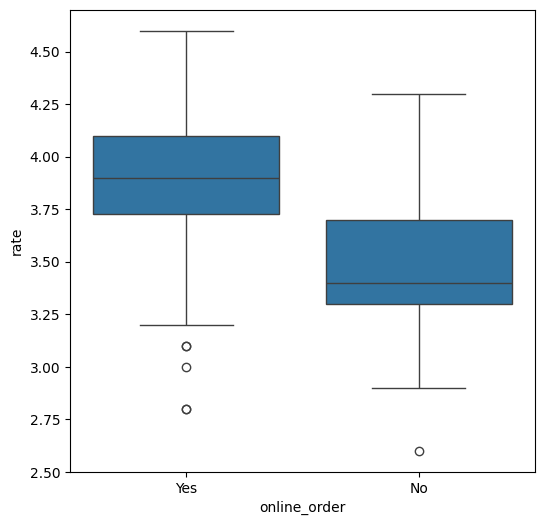

In [37]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = df) 

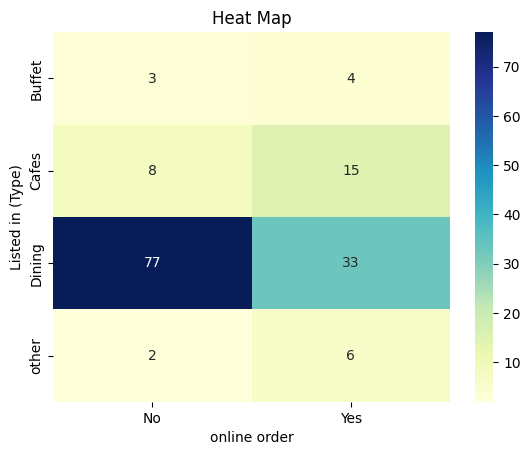

In [51]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True , cmap = 'YlGnBu', fmt = 'd')
plt.title("Heat Map")
plt.xlabel("online order") 
plt.ylabel("Listed in (Type)")
plt.show() 	
 